<a href="https://colab.research.google.com/github/Artenida/computer-vision-exercises/blob/main/Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

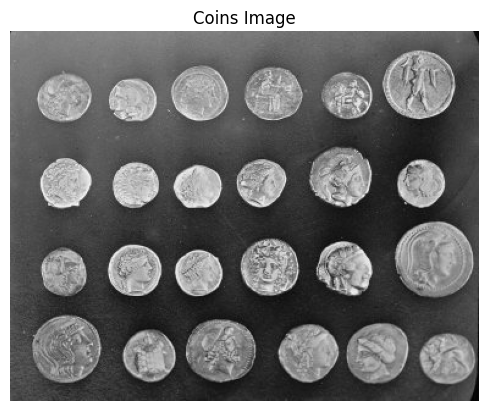

Image size (height, width): (303, 384)
Grayscale pixel value range: [1, 252]


In [ ]:
# 1. Load and visualize the 'coins' image from the skimage built-in datasets. Report the size of the image and range of the pixel grayscale levels.
from skimage import data
import matplotlib.pyplot as plt
import numpy as np

I = data.coins()

plt.imshow(I, cmap='gray')
plt.title("Coins Image")
plt.axis('off')
plt.show()

image_shape = I.shape
print(f"Image size (height, width): {image_shape}")


pixel_min = np.min(I)
pixel_max = np.max(I)
print(f"Grayscale pixel value range: [{pixel_min}, {pixel_max}]")

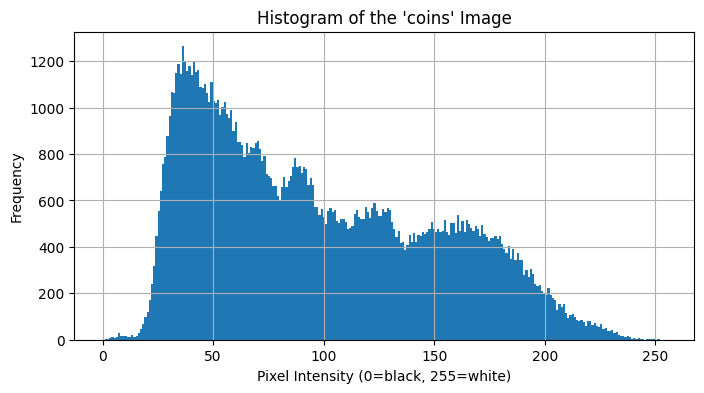

In [ ]:
# Represent the histogram of the image. Explain the peaks of the histogram in terms of regions of the image.

plt.figure(figsize=(8, 4))
plt.hist(I.ravel(), bins=256, range=(0, 255))
plt.title("Histogram of the 'coins' Image")
plt.xlabel("Pixel Intensity (0=black, 255=white)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

	1.	Left Peak (0 to 70): This part of the histogram corresponds to dark regions in the image. Since 0 represents black, and values up to 70 are quite dark, this peak likely corresponds to the background or shadows around the coins.
	2.	Middle Peak (70 to 160): This region includes medium gray values and is likely dominated by the surface of the coins.
	3.	Right Side (160 to 255):These are the lighter regions, and may include highlights or reflections on the coins.

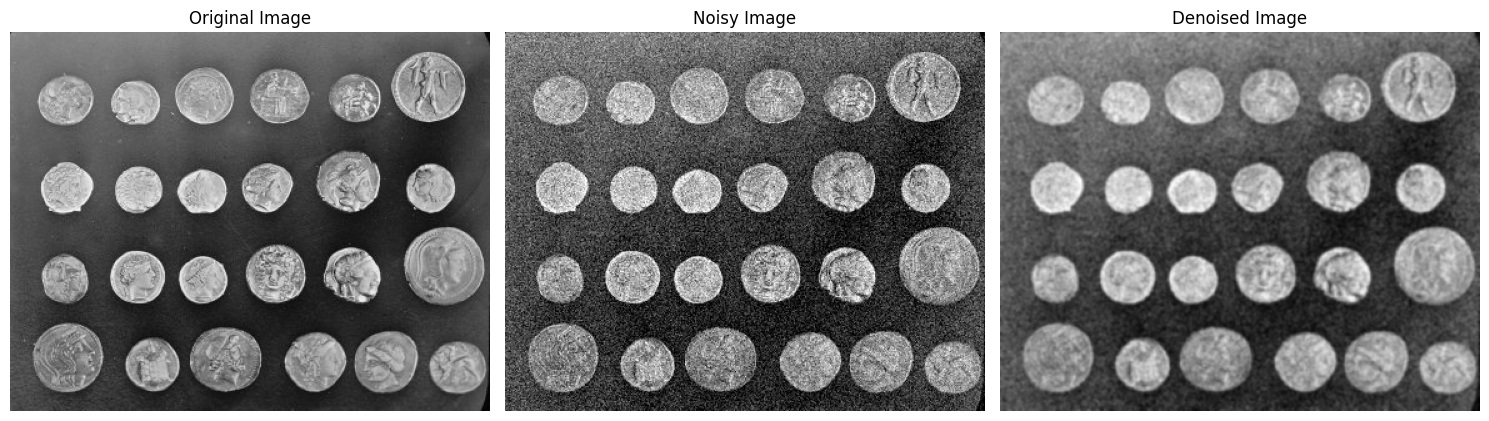

In [ ]:
# Applied noise to the image and use the correct function to erase the noise

from skimage import data, util
from skimage.filters import gaussian
import matplotlib.pyplot as plt

# Load image
I = data.coins()

# Add Gaussian noise
noisy_image = util.random_noise(I, mode='gaussian', var=0.01)

# Apply Gaussian filter
denoised_image = gaussian(noisy_image, sigma=1)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
titles = ['Original Image', 'Noisy Image', 'Denoised Image']

images = [I, noisy_image, denoised_image]

for ax, img, title in zip(axes, images, titles):
    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()

A Gaussian filter smooths an image by averaging nearby pixel values weighted by a Gaussian function. It preserves edges better than a simple average filter.

Since the noise is Gaussian-distributed, a Gaussian filter is mathematically well-suited to reduce it effectively without too much loss of image details.

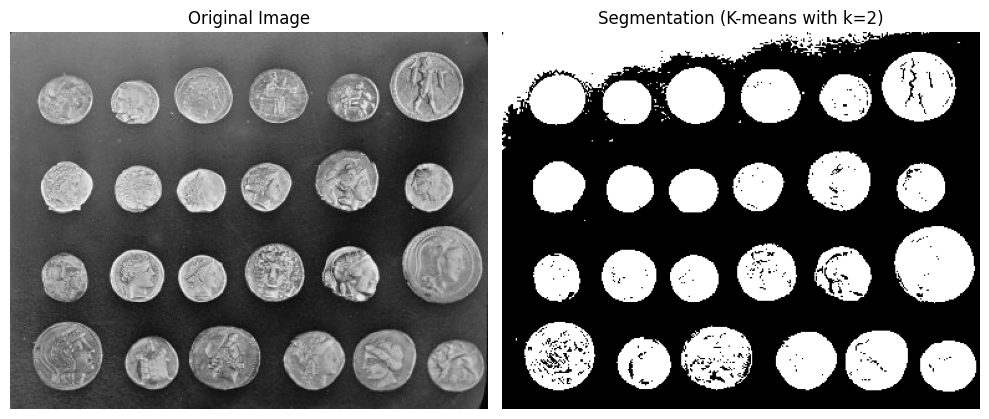

In [ ]:
# Segment the image using a k-means clustering algorithm with k=2 and represent the result

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.cluster import KMeans

# Vectorize the image: convert to (num_pixels, 1), coins image is grayscale
v_I = I.reshape(-1, 1)

# Fit KMeans with 2 clusters
n_clus = 2
kmeans = KMeans(n_clusters=n_clus, random_state=0, n_init=10).fit(v_I)

# Predict cluster for each pixel
v_kmeans = kmeans.predict(v_I)

# Reshape result to original image shape
I_kmeans = np.reshape(v_kmeans, (I.shape[0], I.shape[1]))

fig, axes = plt.subplots(1, 2, figsize=(10, 6))
ax = axes.ravel()

ax[0].imshow(I, cmap=plt.cm.gray)
ax[0].set_title('Original Image')
ax[0].set_axis_off()

ax[1].imshow(I_kmeans, cmap=plt.cm.gray)
ax[1].set_title(f'Segmentation (K-means with k={n_clus})')
ax[1].set_axis_off()

plt.tight_layout()
plt.show()

Creates a clear foreground-background separation. When the coins regions are sufficiently brighter than the background, K-means cleanly isolates them as white regions. Pixels at coin edges may be misclassified.  

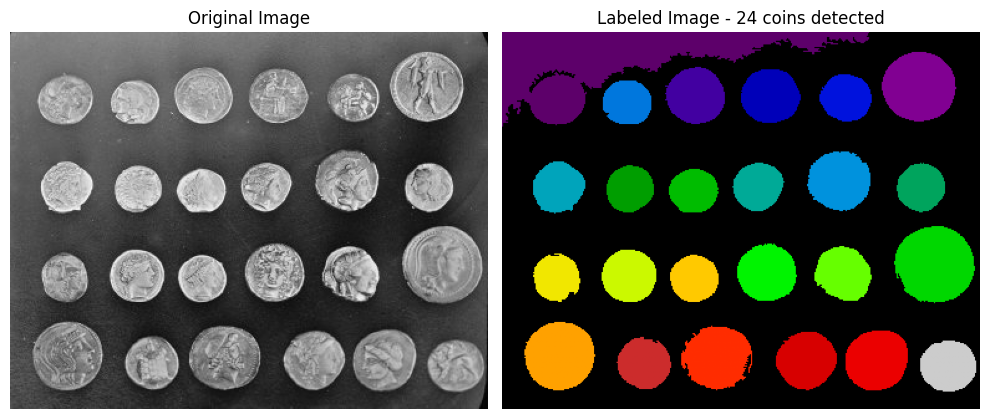

In [ ]:
# Label the objects found in the image. Generate a figure with the original image and the labeled image. How many coins are there in the image?

import matplotlib.pyplot as plt
from skimage import data, filters, measure, morphology

# Load image
I = data.coins()

# Step 1: Threshold
thresh = filters.threshold_otsu(I)
bw = I > thresh

# Step 2: Clean binary image (I had to add this part to get the correct results, because it had problems detecing the correct nr of coins)
bw_cleaned = morphology.remove_small_objects(bw, min_size=100)
bw_cleaned = morphology.remove_small_holes(bw_cleaned, area_threshold=100)

# Step 3: Label connected components
label_image, num_coins = measure.label(bw_cleaned, return_num=True)

fig, axes = plt.subplots(1, 2, figsize=(10, 6))
ax = axes.ravel()

ax[0].imshow(I, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(label_image, cmap='nipy_spectral')
ax[1].set_title(f'Labeled Image - {num_coins} coins detected')
ax[1].axis('off')

plt.tight_layout()
plt.show()

Average Area: 1928.46
Average Major Axis Length: 56.92
Average Orientation (radians): 0.15


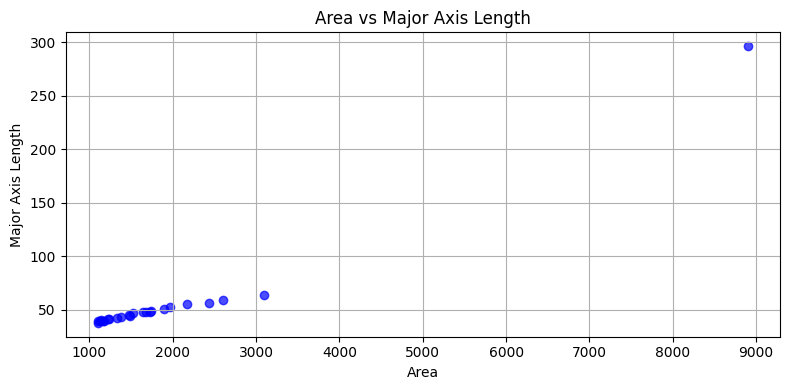

In [ ]:
# Extract the area, major axis length and orientation of each coin. Report the average values of the extracted features. Represent a scatterplot of the area vs major axis length.

import numpy as np
from skimage.measure import regionprops

# Extract region properties
regions = regionprops(label_image)

areas = [r.area for r in regions]
major_axes = [r.major_axis_length for r in regions]
orientations = [r.orientation for r in regions]

# Compute averages
avg_area = np.mean(areas)
avg_major_axis = np.mean(major_axes)
avg_orientation = np.mean(orientations)

print(f"Average Area: {avg_area:.2f}")
print(f"Average Major Axis Length: {avg_major_axis:.2f}")
print(f"Average Orientation (radians): {avg_orientation:.2f}")

plt.figure(figsize=(8, 4))
plt.scatter(areas, major_axes, c='blue', alpha=0.7)
plt.xlabel('Area')
plt.ylabel('Major Axis Length')
plt.title('Area vs Major Axis Length')
plt.grid(True)
plt.tight_layout()
plt.show()

Most coins are of similar size and shape, suggesting good segmentation for the majority.

One large outlier might indicate noise or an object that wasn't properly segmented. This may need filtering or special handling.


In [ ]:
# Filter regions with area > 1750
large_coins = [r for r in regions if r.area > 1750]
num_large_coins = len(large_coins)

print(f"Number of coins with area > 1750 pixels: {num_large_coins}")

Number of coins with area > 1750 pixels: 7


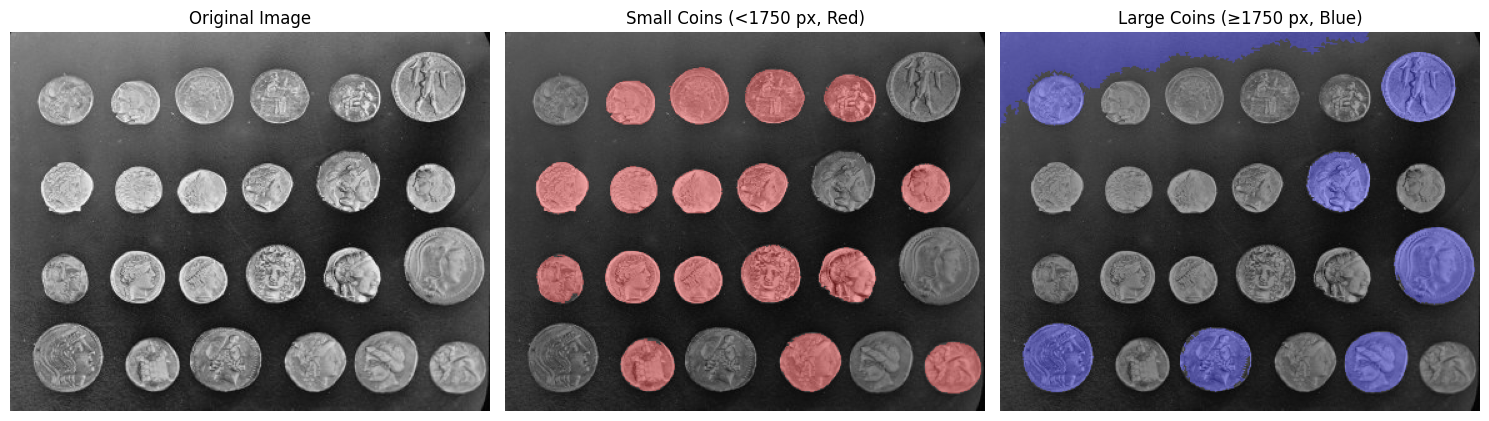

In [ ]:
# Generate a 3-panel figure with the original image, the image with the little coins < 1750 coins (red color) and an image with the big coins > 1750 (blue color).

import numpy as np
import matplotlib.pyplot as plt
from skimage.color import label2rgb

# Create masks for small and large coins
small_mask = np.zeros_like(label_image, dtype=bool)
large_mask = np.zeros_like(label_image, dtype=bool)

for region in regions:
    if region.area < 1750:
        small_mask[label_image == region.label] = True
    else:
        large_mask[label_image == region.label] = True

# Create color overlays
small_overlay = label2rgb(small_mask.astype(int), image=I, colors=['red'], bg_label=0)
large_overlay = label2rgb(large_mask.astype(int), image=I, colors=['blue'], bg_label=0)

fig, axes = plt.subplots(1, 3, figsize=(15, 6))
ax = axes.ravel()

ax[0].imshow(I, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(small_overlay)
ax[1].set_title('Small Coins (<1750 px, Red)')
ax[1].axis('off')

ax[2].imshow(large_overlay)
ax[2].set_title('Large Coins (≥1750 px, Blue)')
ax[2].axis('off')

plt.tight_layout()
plt.show()


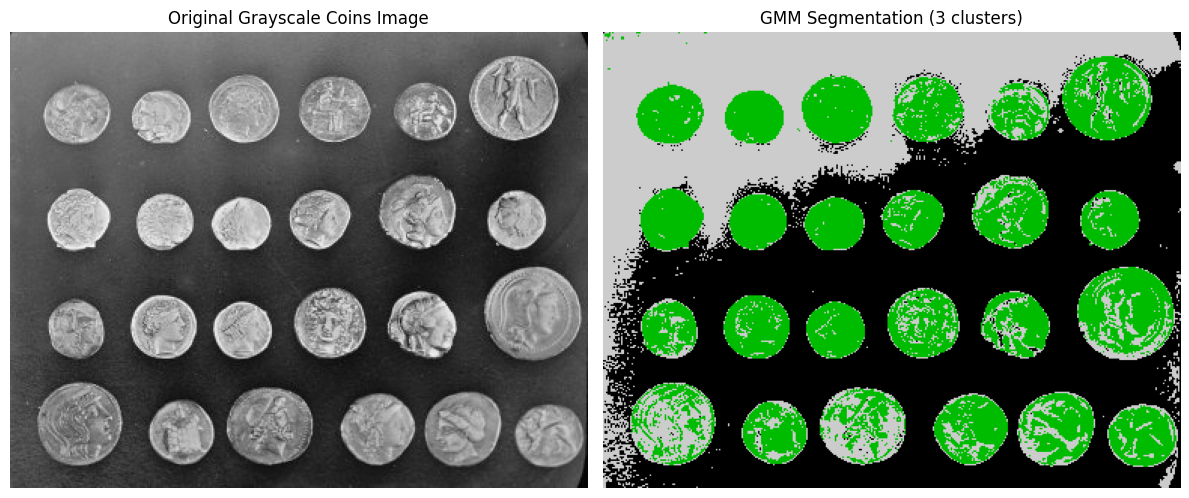

In [ ]:
# Describe the main steps required to perform segmentation of an RGB image using an unsupervised clustering algorithm (use other algorithms different than K-Means and compare the results)

import matplotlib.pyplot as plt
from skimage import data, color, feature
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
import numpy as np

# Load grayscale coins image
img = data.coins()

# Reshape pixels for GMM (N x 1 because grayscale)
pixels = img.reshape(-1, 1)
pixels_scaled = StandardScaler().fit_transform(pixels)

# Apply Gaussian Mixture Model with 3 clusters
gmm = GaussianMixture(n_components=3, random_state=0)
labels = gmm.fit_predict(pixels_scaled)

# Reshape labels back to image shape
segmented = labels.reshape(img.shape)

# Plot original and segmented images
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
ax = axes.ravel()

ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original Grayscale Coins Image')
ax[0].axis('off')

ax[1].imshow(segmented, cmap='nipy_spectral')
ax[1].set_title('GMM Segmentation (3 clusters)')
ax[1].axis('off')

plt.tight_layout()
plt.show()

1. K-means Segmentation (k=2):

The coins are segmented primarily in black and white.

Coins are well separated from the background.

However, details within the coins are largely lost.

It failed to capture complex variations inside the coins.


2. GMM Segmentation (3 clusters):

Uses green, black, and gray to show segmentation with more nuanced clustering.

The segmentation retains fine details within the coins.

Background and coin boundaries are better handled.

Slight noise and misclassification in some areas parts of the background have green.

More computationally intensive.

In [ ]:
# Extract the main texture features of this image

import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_ubyte
from skimage.feature.texture import graycomatrix, graycoprops

img = data.coins()
img = img_as_ubyte(img)  # ensure it's uint8 for GLCM

# Compute Gray-Level Co-occurrence Matrix (GLCM)
glcm = graycomatrix(img,
                    distances=[1],
                    angles=[0, np.pi/4, np.pi/2, 3*np.pi/4],
                    levels=256,
                    symmetric=True,
                    normed=True)

# Extract texture features from GLCM
contrast = graycoprops(glcm, 'contrast').mean()
dissimilarity = graycoprops(glcm, 'dissimilarity').mean()
homogeneity = graycoprops(glcm, 'homogeneity').mean()
energy = graycoprops(glcm, 'energy').mean()
correlation = graycoprops(glcm, 'correlation').mean()

# Display results
print("Texture Features of 'coins' image (averaged over 4 directions):")
print(f"Contrast:       {contrast:.4f}")
print(f"Dissimilarity:  {dissimilarity:.4f}")
print(f"Homogeneity:    {homogeneity:.4f}")
print(f"Energy:         {energy:.4f}")
print(f"Correlation:    {correlation:.4f}")

Texture Features of 'coins' image (averaged over 4 directions):
Contrast:       435.0948
Dissimilarity:  10.4830
Homogeneity:    0.2040
Energy:         0.0179
Correlation:    0.9224


Contrast: 435.0948
This suggests that the image contains sharp edges and intensity changes, as we can see the coins are easily distinguishable from the background.

Dissimilarity = 10.4830 There is a clear visual separation between regions

Homogeneity = 0.2040
Many abrupt intensity changes, the coins have distinc shapes and are not smooth on the surface.


Energy = 0.0179
Coins differ in size, position and orientation

Correlation = 0.9224
The image has structured regions, for example rounded coin shaped, pixel intesities change in a predictable way

**Personal discussion**

This course has been incredibly valuable to me. As someone with a strong interest in computer vision, it has provided a clear and practical starting point for further exploration in the field. What I appreciated most was the balance between theoretical concepts and hands-on applications — it wasn’t just about the math, but also about how computer vision is used in real-world scenarios.

The professor played a key role in making the course engaging and accessible. Complex terms and concepts were explained clearly, which made even the more challenging topics easier to understand. Their approach kept the course dynamic and never dull.

Overall, this has been one of the most rewarding courses I’ve taken. It sparked a deeper interest in the subject, and I definitely plan to continue learning and working in this area. I’m very grateful for the guidance and foundation this course has given me.